In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

file_name = input()
file = open(r'dataset/' + file_name + '.txt')
text = file.readlines()
data = np.array((len(text), 2))

data = np.array(([line.split() for line in text]), dtype=np.float64)
data

s1


array([[664159., 550946.],
       [665845., 557965.],
       [597173., 575538.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

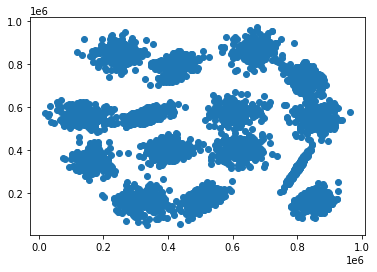

In [45]:
plt.scatter(data[:,0], data[:,1])

13


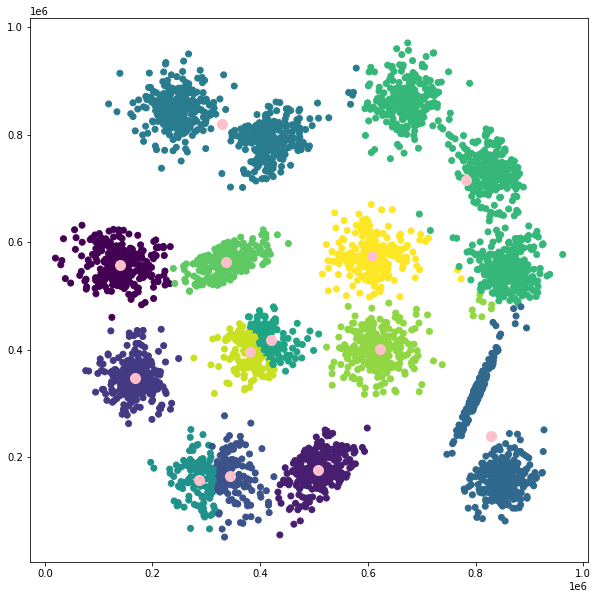

In [46]:
from sklearn.metrics import pairwise_distances_argmin
def draw_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

clusters_number = input()
centers, labels = draw_clusters(data, n_clusters=int(clusters_number))
plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels);
plt.scatter(centers[:,0], centers[:,1], c='pink', s=100);

In [47]:
for i, center in enumerate(centers):
    print('#' + str(i+1) + '|X:=' + str(center[0]) + '|Y:' + str(center[1]))

#1|X:=139395.22898550724|Y:558143.9420289855
#2|X:=508053.32857142854|Y:175644.94857142857
#3|X:=167529.0|Y:347702.66966966965
#4|X:=344378.01492537314|Y:164003.19402985074
#5|X:=828401.4551083591|Y:239679.86068111454
#6|X:=329503.33181818185|Y:819054.3378787879
#7|X:=287217.4928571429|Y:157973.65
#8|X:=420849.461038961|Y:417929.4935064935
#9|X:=783067.607|Y:716313.444
#10|X:=337264.7629179331|Y:562123.3799392097
#11|X:=623492.3832853026|Y:400726.82708933717
#12|X:=381158.404040404|Y:394705.3686868687
#13|X:=607006.3501683502|Y:573801.4377104377
